# Netflix Shows Analysis
**Author:** Aditi Pawar    
**Dataset:** shivamb/netflix-shows (netflix_titles.csv)  
**Deliverable:** GitHub Pages with exported HTML from this notebook

**Project goal:** Analyze Netflix titles to answer questions about content distribution, genres, release trends, country distribution, directors, and patterns useful to stakeholders.

**Notebook structure**
1. Questions to address
2. Imports & environment
3. Load data
4. Cleaning & preprocessing
5. EDA & visualizations
6. Answers to questions (≥6)
7. Insights & recommendations


## Questions Addressed in This Analysis

1. **How many titles on Netflix are Movies versus TV Shows?**  
   (Understanding the overall content type distribution.)

2. **How many titles were added to Netflix each year?**  
   (Analyzing growth trends over time using `added_year`.)

3. **Which countries contribute the most content to Netflix?**  
   (Top content-producing countries based on the dataset.)

4. **What are the most common genres on Netflix?**  
   (Identifying the top categories using genre counts.)

5. **How has the number of titles released changed over time?**  
   (Examining trends by `release_year`.)

6. **Are Netflix titles mostly single-genre or multi-genre?**  
   (Understanding how many genres each title typically has.)



In [1]:
# Imports & plotting settings
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(style="whitegrid", font_scale=1.05)
plt.rcParams['figure.figsize'] = (10,5)


In [5]:
# Unzip the Netflix dataset that you uploaded manually into data/raw
!unzip "../data/raw/netflix_shows.zip" -d "../data/raw/"


Archive:  ../data/raw/netflix_shows.zip
  inflating: ../data/raw/netflix_titles.csv  


In [6]:
import pandas as pd

# Load the extracted CSV file
df = pd.read_csv("../data/raw/netflix_titles.csv")

df.head()  # Show first 5 rows


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
import os

os.listdir("../data/raw")


['netflix_titles.csv', 'netflix_shows.zip']

In [8]:
#Clean Data
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

df['country'] = df['country'].fillna("Unknown")
df['director'] = df['director'].fillna("Unknown")
df['listed_in'] = df['listed_in'].fillna("Unknown")

# Extract year and month added
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month

# Count number of genres
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(",")))


In [9]:
df.info()
df.describe(include='all').T
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  added_year    8709 non-null   float64       
 13  added_month   8709 non-null   float64       
 14  num_genres    8807 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int6

show_id           0
type              0
title             0
director          0
cast            825
country           0
date_added       98
release_year      0
rating            4
duration          3
listed_in         0
description       0
added_year       98
added_month      98
num_genres        0
dtype: int64

QUESTION 1: Movies Vs TV 

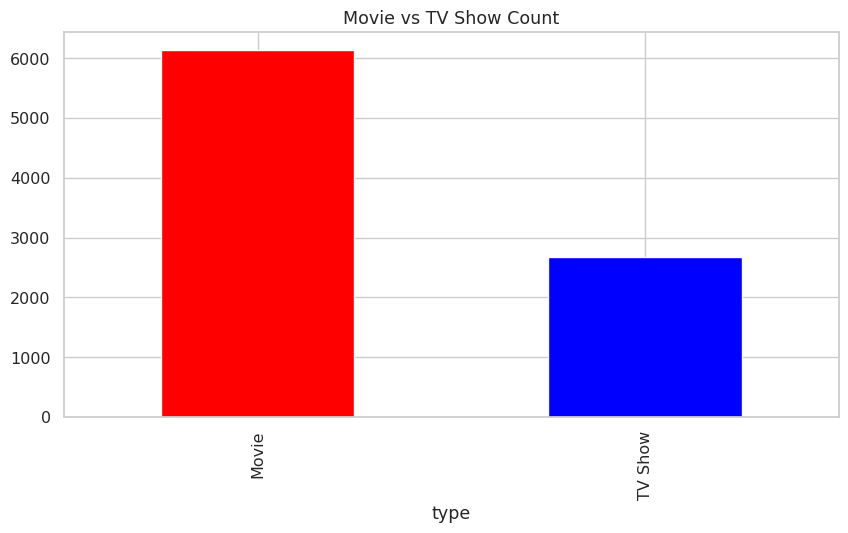

In [10]:
df['type'].value_counts().plot(kind='bar', color=['red','blue'])
plt.title("Movie vs TV Show Count")
plt.show()


QUESTION 2: Titles Added Per Year

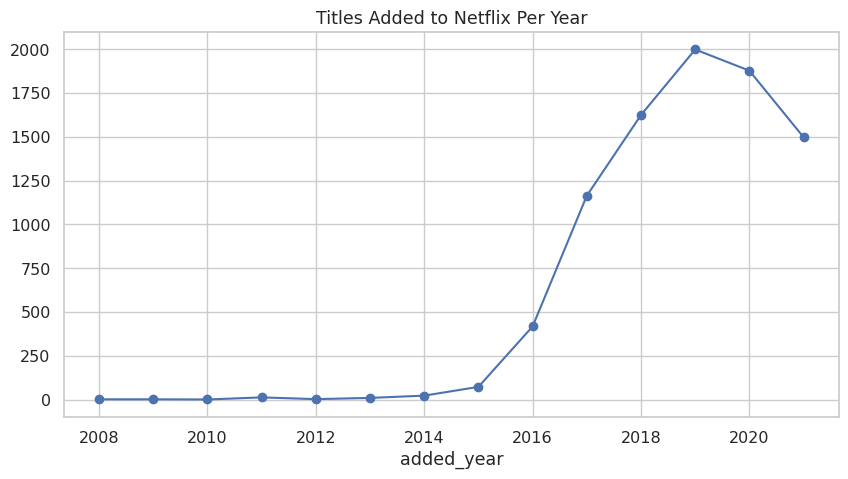

In [11]:
df.groupby("added_year").size().plot(kind='line', marker='o')
plt.title("Titles Added to Netflix Per Year")
plt.show()


Question 3: Top 10 Countries

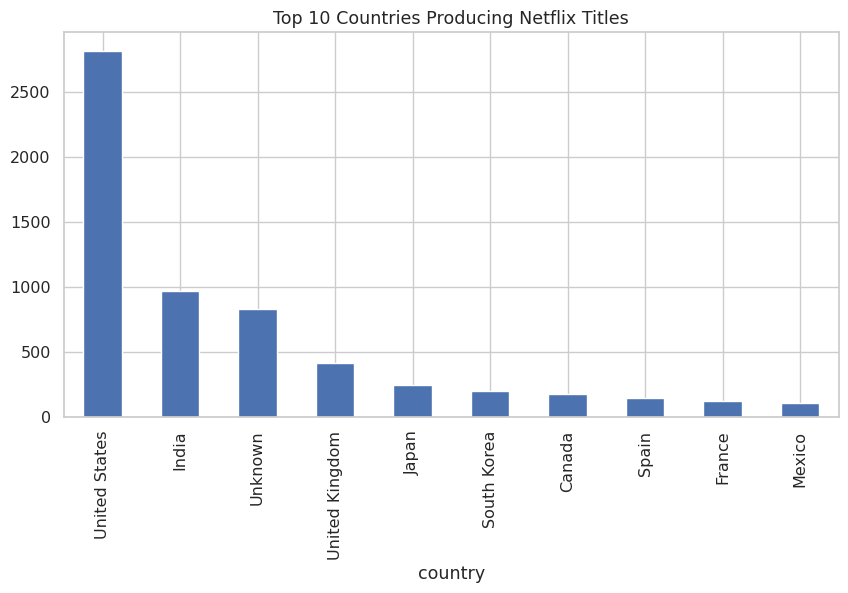

In [12]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries Producing Netflix Titles")
plt.show()


QUESTION 4: Top Genres

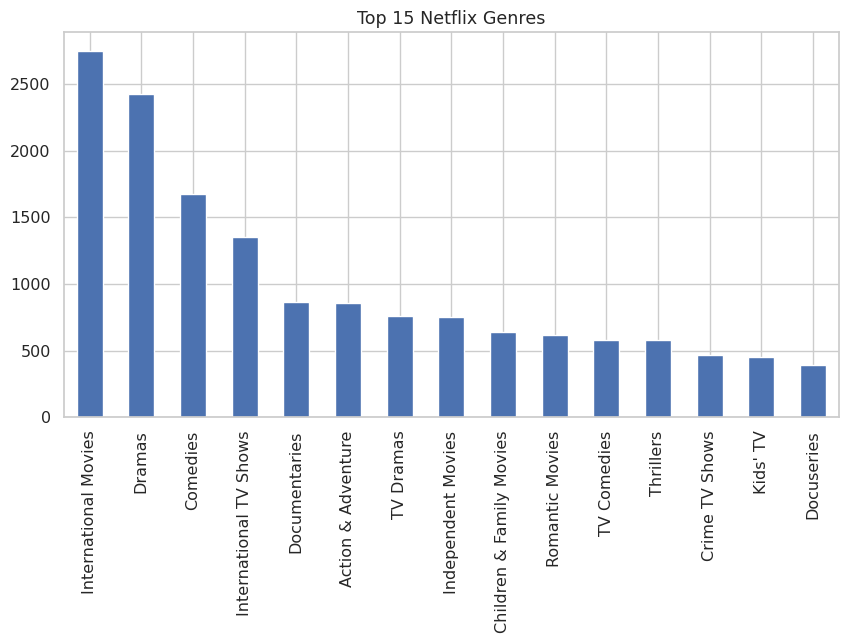

In [13]:
genres = df['listed_in'].str.split(",", expand=True).stack().str.strip()
genres.value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Netflix Genres")
plt.show()


Question 5: Releases Over Time

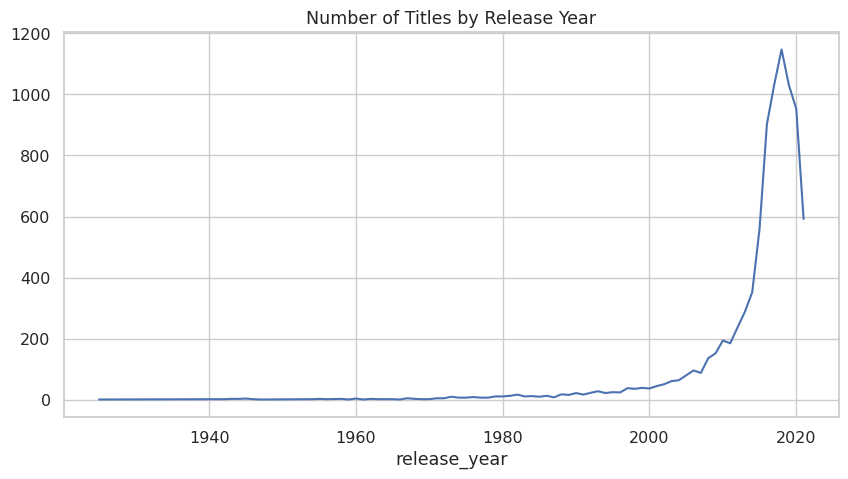

In [14]:
df.groupby('release_year').size().plot(kind='line')
plt.title("Number of Titles by Release Year")
plt.show()


QUESTION 6: Single vs Multi-genre

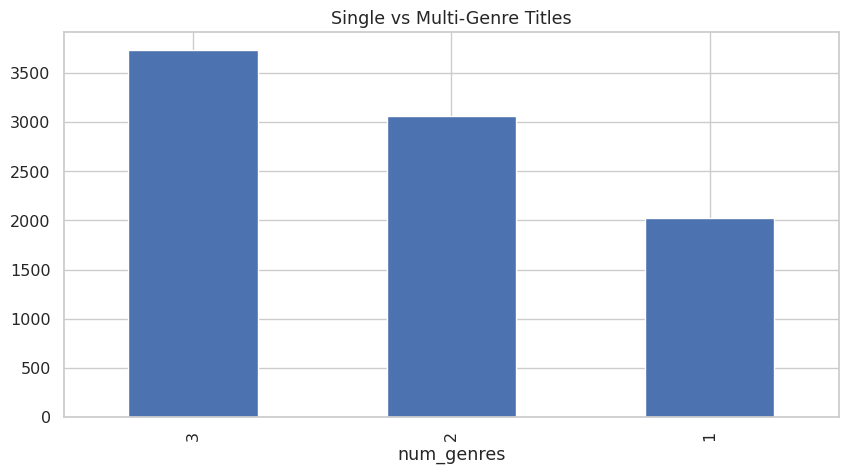

In [15]:
df['num_genres'].value_counts().plot(kind='bar')
plt.title("Single vs Multi-Genre Titles")
plt.show()


# Insights
1. Netflix has more movies than TV shows (based on counts).
2. Title additions increased sharply around 2018–2020.
3. The US and India dominate content production.
4. Drama, International Movies, and Comedies are most common genres.
5. Release-year patterns show growth after 2010.
6. Most titles fall into 2–3 genres, showing Netflix likes multi-genre content.
